#### Things we have analysed here are
* Which streaming platform(s) can I find this movie on?
* Average IMDb ratings of a movie produced in a country?
* Target age group movies vs the streaming application they can be found on
* The year during which a movie was produced and the streaming platform they can be found on
* Analysis of the popularity of a movie vs year


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv


Lets see the visualitation of the movies avaiable in the OTT platform and Lets see which platform is best for subscription



In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
movie = pd.read_csv('/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv')
movie

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [4]:
movie.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

Dropping the rotten tomatoes ratings very few movies rating are available

In [6]:
movie.drop("Rotten Tomatoes",axis=1,inplace=True)

In [7]:
#check the null count
movie.isnull().sum()

Unnamed: 0        0
ID                0
Title             0
Year              0
Age            9390
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       726
Genres          275
Country         435
Language        599
Runtime         592
dtype: int64

In [8]:
print('Total number of movies                : ',movie['Title'].count() )
print('Total number of movies in Netflix     : ',movie['Netflix'].sum() )
print('Total number of movies in Hulu        : ',movie['Hulu'].sum() )
print('Total number of movies in Prime Video : ',movie['Prime Video'].sum() )
print('Total number of movies in Disney+     : ',movie['Disney+'].sum() )

Total number of movies                :  16744
Total number of movies in Netflix     :  3560
Total number of movies in Hulu        :  903
Total number of movies in Prime Video :  12354
Total number of movies in Disney+     :  564


From the above data, we can find that Amazon prime has lots of movies

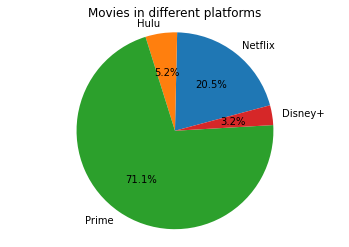

In [9]:
data = [movie['Netflix'].sum(),movie['Hulu'].sum(),movie['Prime Video'].sum(),movie['Disney+'].sum()]
my_labels = 'Netflix','Hulu','Prime','Disney+'
plt.pie(data, labels=my_labels, autopct='%1.1f%%', startangle=15)
plt.title('Movies in different platforms')
plt.axis('equal')
plt.show()

In [10]:
set(movie.Country.values)

{nan,
 'West Germany,South Africa,United States',
 'United States,Italy,United Kingdom',
 'Ireland,Sweden,United Kingdom',
 'United States,Netherlands,United Kingdom,Denmark',
 'Germany,France,United States,Canada,United Kingdom,China',
 'Belgium,United States',
 'United States,Egypt',
 'United States,Ethiopia',
 'United Kingdom,Germany,Canada,United States',
 'United States,Iraq,United Kingdom',
 'Mexico',
 'Serbia,United States',
 'Brazil,United States',
 'Germany,Japan,United States',
 'Switzerland,Ireland',
 'Canada,France',
 'Czech Republic,France,Slovakia',
 'United Kingdom,Spain,Belgium',
 'Dominican Republic',
 'Republic of North Macedonia,Belgium,France,Slovenia',
 'Argentina,Australia',
 'Canada,New Zealand,United States',
 'United States,New Zealand',
 'Italy,Spain,France',
 'South Africa,Canada,United Kingdom,Germany',
 'United States,Canada,United Kingdom',
 'Hungary',
 'Italy,France,Germany',
 'United States,Germany,Canada,United Kingdom,Italy,France',
 'Colombia,Peru,Uni

In [11]:

len(set(movie.Country.values))

1304

In [12]:
movie.max()

Unnamed: 0     16743
ID             16744
Title           워터댄스
Year            2020
IMDb             9.3
Netflix            1
Hulu               1
Prime Video        1
Disney+            1
Type               0
Runtime         1256
dtype: object

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:975: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  **self.kwds,


<Figure size 720x720 with 0 Axes>

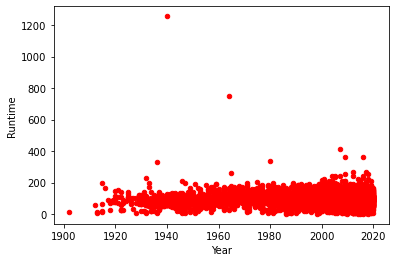

In [13]:
plt.figure(figsize = (10, 10))
movie.plot(x='Year',y='Runtime',kind='scatter',color='R')
plt.show()

In [14]:
seperated_genres = movie['Genres'].str.get_dummies(',')
seperated_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
16740,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
16741,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16742,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
seperated_genres.sum()

Action         2683
Adventure      1778
Animation       711
Biography       821
Comedy         4637
Crime          1833
Documentary    2546
Drama          7227
Family         1514
Fantasy        1089
Film-Noir        79
Game-Show         7
History         715
Horror         2201
Music           667
Musical         401
Mystery        1274
News            105
Reality-TV       22
Romance        2359
Sci-Fi         1228
Short           386
Sport           404
Talk-Show        19
Thriller       3354
War             539
Western         499
dtype: int64

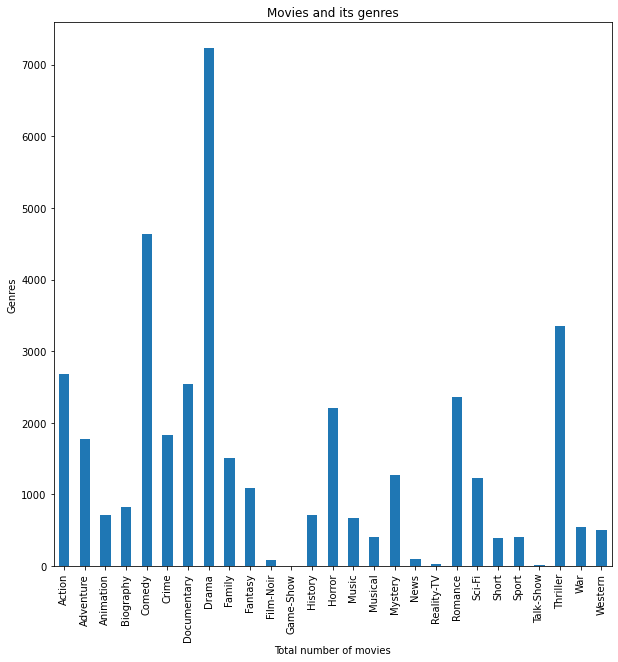

In [16]:
plt.figure(figsize = (10, 10))
seperated_genres.sum().plot(kind="bar")
plt.ylabel('Genres')
plt.xlabel('Total number of movies')
plt.title('Movies and its genres')
plt.show()

In [17]:
movie.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')

In [18]:
len(set(movie.Language.values))

1103

In [19]:
movie.Language.unique()

array(['English,Japanese,French', 'English', 'Italian', ...,
       'Greek,French', 'English,Swedish,German', 'English,Algonquin'],
      dtype=object)

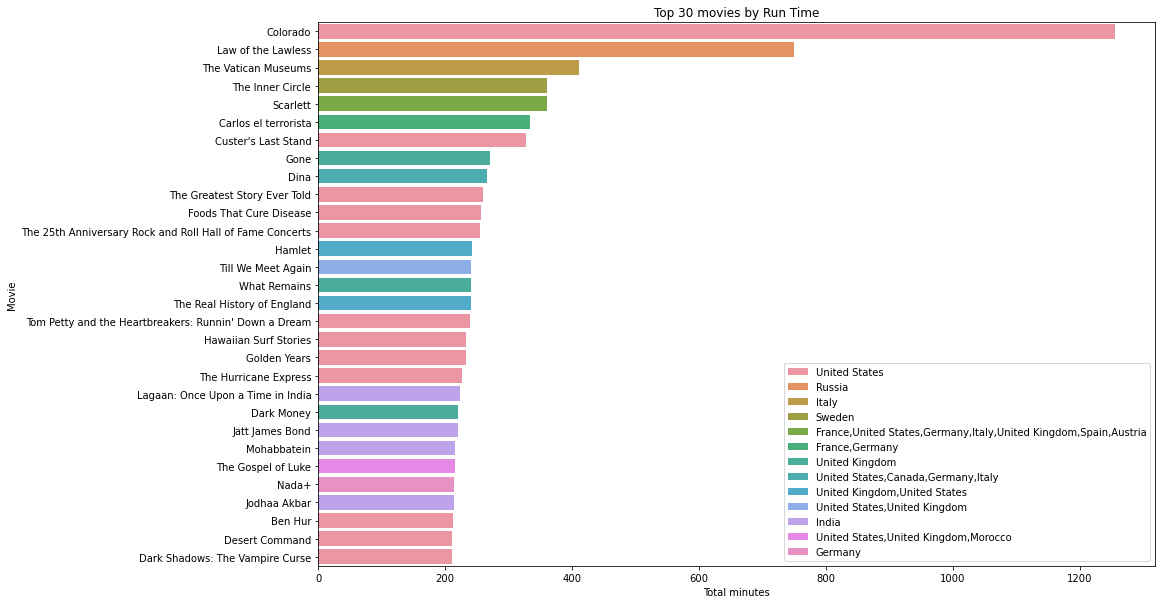

In [20]:

top_30_screenplay = movie.sort_values(by = 'Runtime', ascending = False).head(30)
plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'Runtime', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total minutes')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

Age
13+    1255
16+     320
18+    3474
7+     1462
all     843
Name: ID, dtype: int64


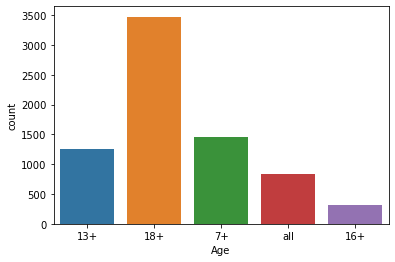

In [21]:
print(movie.groupby("Age").count()["ID"])

sns.countplot(data=movie,x="Age")

In [22]:
n = 50

top_ratings = movie.sort_values(by="IMDb",ascending=False).reset_index().iloc[:n]
top_ratings

,index,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1292,1292,1293,My Next Guest with David Letterman and Shah Ru...,2019,NaN,9.3,1,0,0,0,0,NaN,Talk-Show,NaN,NaN,61.0
1,7220,7220,7221,"Down, But Not Out!",2015,NaN,9.3,0,0,1,0,0,Miguel Gaudêncio,"Documentary,Sport",Poland,Polish,68.0
2,6566,6566,6567,Square One,2019,NaN,9.3,0,0,1,0,0,Danny Wu,"Documentary,Drama,Music",United States,English,83.0
3,5110,5110,5111,Love on a Leash,2011,NaN,9.3,0,0,1,0,0,Fen Tian,"Comedy,Drama,Fantasy,Romance",United States,NaN,90.0
4,6837,6837,6838,Steven Banks: Home Entertainment Center,1989,NaN,9.3,0,0,1,0,0,Tom McLoughlin,Comedy,United States,English,60.0
5,7426,7426,7427,Bounty,2011,NaN,9.3,0,0,1,0,0,Roger Donaldson,"Adventure,Drama,History,Romance","United Kingdom,United States,New Zealand",English,132.0
6,8458,8458,8459,Where's Daddy?,2017,NaN,9.1,0,0,1,0,0,Rel Dowdell,Documentary,United States,English,105.0
7,947,947,948,Natsamrat,2016,NaN,9.1,1,0,0,0,0,Mahesh Manjrekar,"Drama,Family",India,Marathi,166.0
8,7491,7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,0,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War","United Kingdom,Bosnia and Herzegovina","Bosnian,English",56.0
9,7267,7267,7268,A Dog Named Gucci,2015,NaN,9.0,0,0,1,0,0,Gorman Bechard,"Documentary,Biography,Drama,News",United States,English,90.0


In [23]:
new_movies = movie[movie['Year'] > 2010]
new_movies

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
2,2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
7,7,8,Django Unchained,2012,18+,8.4,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
13,13,14,Room,2015,18+,8.1,1,0,0,0,0,Lenny Abrahamson,"Drama,Thriller","Ireland,Canada,United Kingdom,United States",English,118.0
19,19,20,Her,2013,18+,8.0,1,0,0,0,0,Spike Jonze,"Drama,Romance,Sci-Fi",United States,English,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,16731,16732,Earth Live,2017,NaN,5.5,0,0,0,1,0,Glenn Weiss,Documentary,United States,English,NaN
16733,16733,16734,Sea of Hope: America's Underwater Treasures,2017,NaN,7.3,0,0,0,1,0,Robert Nixon,Documentary,United States,English,48.0
16736,16736,16737,Winged Seduction: Birds of Paradise,2012,NaN,6.5,0,0,0,1,0,Molly Hermann,Documentary,United States,English,NaN
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN


In [24]:
print('Total number of new movies                : ',new_movies['Title'].count() )
print('Total number of new movies in Netflix     : ',new_movies['Netflix'].sum() )
print('Total number of new movies in Hulu        : ',new_movies['Hulu'].sum() )
print('Total number of new movies in Prime Video : ',new_movies['Prime Video'].sum() )
print('Total number of new movies in Disney+     : ',new_movies['Disney+'].sum() )

Total number of new movies                :  9231
Total number of new movies in Netflix     :  2884
Total number of new movies in Hulu        :  676
Total number of new movies in Prime Video :  5930
Total number of new movies in Disney+     :  155


<Figure size 720x1080 with 0 Axes>

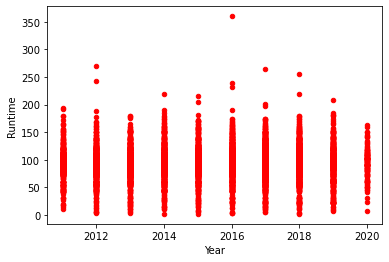

In [25]:
plt.figure(figsize = (10, 15))
new_movies.plot(x='Year',y='Runtime',kind='scatter',color='R')
plt.show()

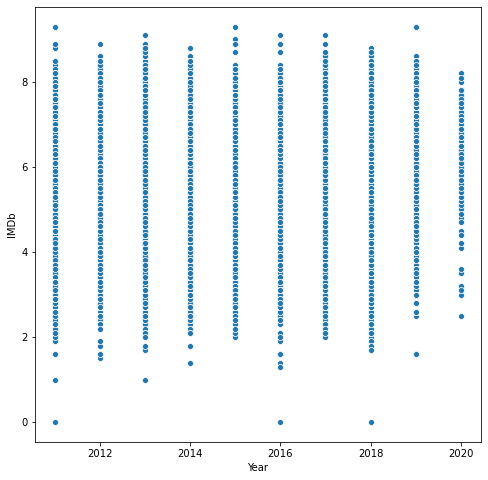

In [26]:
x = new_movies["Year"]
y = new_movies["IMDb"]

plt.figure(figsize=(8,8))
sns.scatterplot(x,y,data=new_movies,)

In [27]:
rate_mov = movie[movie['IMDb'] > 8]

In [28]:
print("Total Movies with more than 8+ rating(IMDb)     : ", rate_mov['ID'].count())
print('Total number of movies 8+ rating in Netflix     : ',rate_mov['Netflix'].sum() )
print('Total number of movies 8+ rating in Hulu        : ',rate_mov['Hulu'].sum() )
print('Total number of movies 8+ rating in Prime Video : ',rate_mov['Prime Video'].sum() )
print('Total number of movies 8+ rating in Disney+     : ',rate_mov['Disney+'].sum() )

Total Movies with more than 8+ rating(IMDb)     :  478
Total number of movies 8+ rating in Netflix     :  129
Total number of movies 8+ rating in Hulu        :  23
Total number of movies 8+ rating in Prime Video :  324
Total number of movies 8+ rating in Disney+     :  21


In [29]:
top_rated_data = pd.DataFrame({
    'platforms' : ['Netflix', 
                   'Disney', 
                   'Prime Video', 
                   'Hulu'],
    'total_mov' : [rate_mov['Netflix'].sum(),
                   rate_mov['Disney+'].sum(),
                   rate_mov['Prime Video'].sum(),
                   rate_mov['Hulu'].sum()]
})


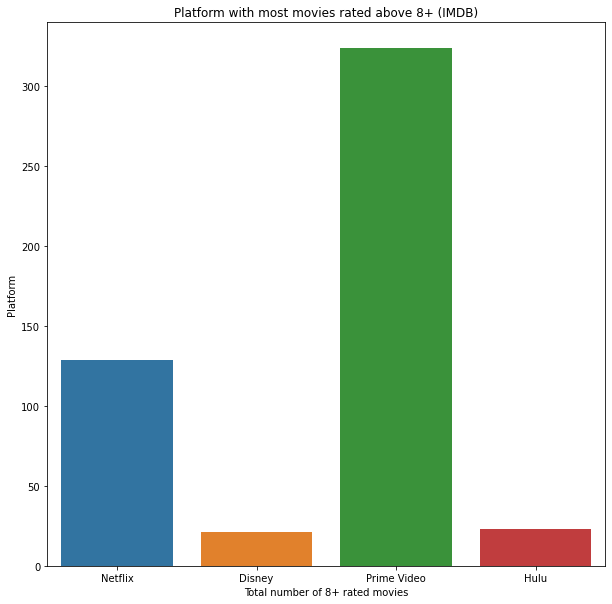

In [30]:
plt.figure(figsize = (10, 10))
sns.barplot(data = top_rated_data,
           x = top_rated_data['platforms'],
           y = top_rated_data['total_mov']
)
plt.ylabel('Platform')
plt.xlabel('Total number of 8+ rated movies')
plt.title('Platform with most movies rated above 8+ (IMDB)')
plt.show()

In [31]:
india = movie[movie.Country =='India']
india

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
11,11,12,3 Idiots,2009,13+,8.4,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0
34,34,35,Dangal,2016,7+,8.4,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport",India,Hindi,161.0
38,38,39,Like Stars on Earth,2007,7+,8.4,1,0,0,0,0,"Aamir Khan,Amole Gupte","Drama,Family",India,"Hindi,English",165.0
81,81,82,Lagaan: Once Upon a Time in India,2001,7+,8.1,1,0,0,0,0,Ashutosh Gowariker,"Adventure,Drama,Musical,Sport",India,"Hindi,English,Awadhi,Urdu",224.0
88,88,89,Bahubali: The Beginning,2015,13+,8.1,1,0,0,0,0,S.S. Rajamouli,"Action,Drama",India,"Telugu,Tamil",159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,15820,15821,Escape From Taliban,2003,NaN,4.5,0,0,1,0,0,Ujjwal Chatterjee,"Adventure,Drama,Thriller,War",India,"Hindi,English,Urdu",166.0
15822,15822,15823,Machine,2007,18+,2.7,0,0,1,0,0,"Abbas Alibhai Burmawalla,Mastan Alibhai Burmaw...","Action,Mystery,Romance,Thriller",India,Hindi,148.0
15854,15854,15855,KAALA (Malayalam),2018,NaN,NaN,0,0,1,0,0,Anuraj,"Short,Mystery",India,Malayalam,20.0
16064,16064,16065,Prathighatana,2014,NaN,NaN,0,0,1,0,0,Tammareddy Bharadwaja,Drama,India,Telugu,117.0


In [32]:
print('Total number of Indian movies                : ',india['Title'].count() )
print('Total number of Indian movies in Netflix     : ',india['Netflix'].sum() )
print('Total number of Indian movies in Hulu        : ',india['Hulu'].sum() )
print('Total number of Indian movies in Prime Video : ',india['Prime Video'].sum() )
print('Total number of Indian movies in Disney+     : ',india['Disney+'].sum() )

Total number of Indian movies                :  1064
Total number of Indian movies in Netflix     :  539
Total number of Indian movies in Hulu        :  3
Total number of Indian movies in Prime Video :  617
Total number of Indian movies in Disney+     :  1


In [33]:
indian_mov = india[india['IMDb'] > 7]
print("Total Movies with more than 7+ rating(IMDb)     : ", indian_mov['ID'].count())
print('Total number of movies 8+ rating in Netflix     : ', indian_mov['Netflix'].sum() )
print('Total number of movies 8+ rating in Hulu        : ',indian_mov['Hulu'].sum() )
print('Total number of movies 8+ rating in Prime Video : ',indian_mov['Prime Video'].sum() )
print('Total number of movies 8+ rating in Disney+     : ',indian_mov['Disney+'].sum() )

Total Movies with more than 7+ rating(IMDb)     :  347
Total number of movies 8+ rating in Netflix     :  172
Total number of movies 8+ rating in Hulu        :  1
Total number of movies 8+ rating in Prime Video :  195
Total number of movies 8+ rating in Disney+     :  0


In [34]:
tamil = movie[movie.Language =='Tamil']
tamil

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
547,547,548,Petta,2019,NaN,7.3,1,0,0,0,0,Karthik Subbaraj,"Action,Drama",India,Tamil,171.0
1174,1174,1175,Mersal,2017,NaN,7.7,1,0,0,0,0,Atlee Kumar,"Action,Thriller",India,Tamil,172.0
1231,1231,1232,Kannum Kannum Kollaiyadithaal,2020,NaN,7.7,1,0,0,0,0,Desingh Periyasamy,"Drama,Romance,Thriller",India,Tamil,160.0
1588,1588,1589,Sillu Karupatti,2019,NaN,8.3,1,0,0,0,0,Halitha Shameem,"Drama,Romance",India,Tamil,153.0
1805,1805,1806,Pa Paandi,2017,NaN,7.6,1,0,1,0,0,Dhanush,"Action,Drama,Family,Musical,Romance",India,Tamil,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14377,14377,14378,Unakkenna Venum Sollu,2015,NaN,5.8,0,0,1,0,0,Srinath Ramalingam,Horror,India,Tamil,122.0
14482,14482,14483,Neengal Kettavai,1984,NaN,6.3,0,0,1,0,0,Balu Mahendra,"Crime,Drama,Music",India,Tamil,125.0
14582,14582,14583,Wagah,2016,NaN,3.4,0,0,1,0,0,Kumaravelan,"Action,Drama",India,Tamil,122.0
14690,14690,14691,Sagaptham,2015,NaN,3.1,0,0,1,0,0,Surendran Kaliyaperumal,"Action,Drama",India,Tamil,155.0


In [35]:
print('Total number of Tamil movies                : ',tamil['Title'].count() )
print('Total number of Tamil movies in Netflix     : ',tamil['Netflix'].sum() )
print('Total number of Tamil movies in Hulu        : ',tamil['Hulu'].sum() )
print('Total number of Tamil movies in Prime Video : ',tamil['Prime Video'].sum() )
print('Total number of Tamil movies in Disney+     : ',tamil['Disney+'].sum() )

Total number of Tamil movies                :  93
Total number of Tamil movies in Netflix     :  31
Total number of Tamil movies in Hulu        :  0
Total number of Tamil movies in Prime Video :  71
Total number of Tamil movies in Disney+     :  0


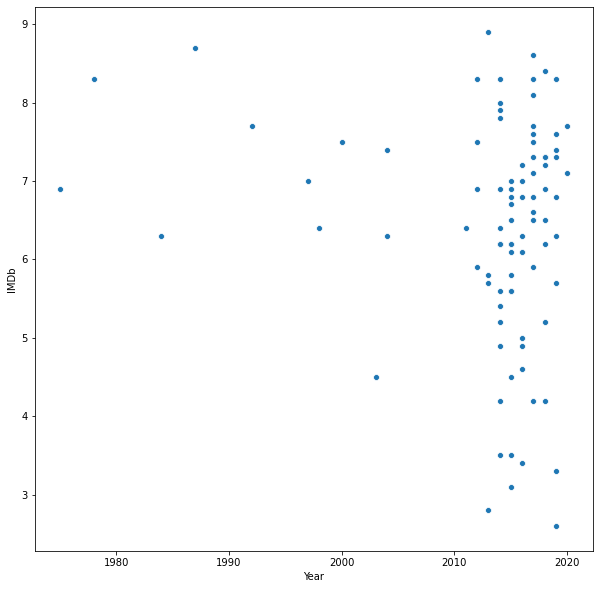

In [36]:
# Total tamil movies and the years realeased and IMDB rating
x = tamil["Year"]
y = tamil["IMDb"]

plt.figure(figsize=(10,10))
m = sns.scatterplot(x,y,data=tamil,)


On analysis, 
* we can find that there are 16744 number of movies available in all OTT platforms.
    * Total number of movies in Netflix     :  3560
    * Total number of movies in Hulu        :  903
    * Total number of movies in Prime Video :  12354
    * Total number of movies in Disney+     :  564

** Top 3 genres**
* Comedy         4637
* Drama          7227
* Thriller       3354


**Movies released after 2010 available in OTT are**
* Total number of new movies                :  9231
* Total number of new movies in Netflix     :  2884
* Total number of new movies in Hulu        :  676
* Total number of new movies in Prime Video :  5930
* Total number of new movies in Disney+     :  155

* Total Movies with more than 8+ rating(IMDb)     :  478
* Total number of movies 8+ rating in Netflix     :  129
* Total number of movies 8+ rating in Hulu        :  23
* Total number of movies 8+ rating in Prime Video :  324
* Total number of movies 8+ rating in Disney+     :  21